# A "Thin" Application of Time Series

Google Trends allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called diet. A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the pandas basics Cheat Sheet and keep it handy!

In [4]:
import pandas as pd
diet = pd.read_csv("dataset/NOAA_TAVG.csv")
# Convert the date index to datetime
diet['DATE'] = pd.to_datetime(diet['DATE'], format='%Y')
diet.set_index('DATE', inplace=True)
diet

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3
...,...
2012-01-01,57.3
2013-01-01,55.3
2014-01-01,54.4


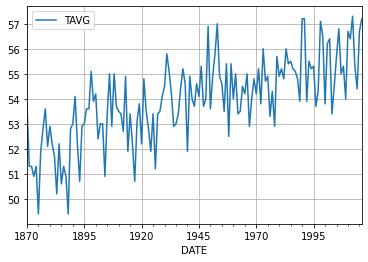

In [5]:
import matplotlib.pyplot as plt
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

In [9]:
diet.index

DatetimeIndex(['1870-01-01', '1871-01-01', '1872-01-01', '1873-01-01',
               '1874-01-01', '1875-01-01', '1876-01-01', '1877-01-01',
               '1878-01-01', '1879-01-01',
               ...
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='DATE', length=147, freq=None)

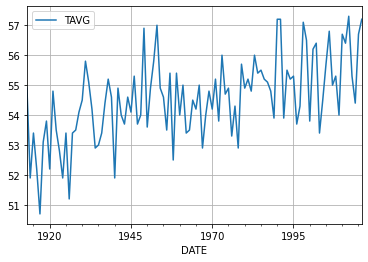

In [12]:
# Slice the dataset to keep only from 1912
diet2012 = diet[diet.index.year > 1912]

# Plot 2012 data
diet2012.plot(grid = True)
plt.show()

# Merging Time Series With Different Dates

Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas `.join()` method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

In [63]:
stocks = pd.read_csv("dataset/DJI.csv")
stocks.set_index("Date",inplace=True)
print(stocks.head())
bonds = pd.read_csv("dataset/HRB.csv")
bonds["Quarter"]=bonds["Quarter"].str.replace("Q", "-Q", regex=True)
bonds["Date"] = pd.PeriodIndex(bonds["Quarter"], freq='Q').to_timestamp()
bonds.drop("Quarter", axis=1, inplace=True)
bonds.set_index("Date",inplace=True)
bonds = bonds.resample('A').sum()
bonds.index =bonds.index.year
print(bonds.head())

       Value
Date        
1941  110.96
1942  119.40
1943  135.89
1944  152.32
1945  192.91
      Earnings
Date          
2007      1.18
2008      1.37
2009      1.52
2010      1.58
2011      1.64


In [64]:
# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)



{1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006}


In [77]:
# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how = 'inner')
stocks_and_bonds

,Value,Earnings
Date,,
2007,13264.82,1.18
2008,8776.39,1.37
2009,10428.05,1.52
2010,11577.51,1.58
2011,12217.56,1.64
2012,13104.14,1.39
2013,16576.66,1.60


# Correlation of Stocks and Bonds

Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

Stock prices and 10-year bond yields are combined in a DataFrame called `stocks_and_bonds` under columns `SP500` and `US10Y`

In [78]:
import numpy as np
stocks_and_bonds.columns = ["SP500", "US10Y"]
stocks_and_bonds["SP500"] = np.round(stocks_and_bonds["SP500"].div(10000),2)
stocks_and_bonds.head()

,SP500,US10Y
Date,,
2007,1.33,1.18
2008,0.88,1.37
2009,1.04,1.52
2010,1.16,1.58
2011,1.22,1.64


Correlation of stocks and interest rates:  -0.15861856018815151


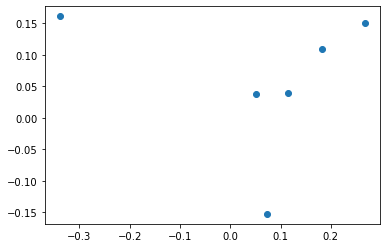

In [79]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['US10Y'].corr(returns['SP500'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(x=returns['SP500'],
                      y=returns['US10Y'])
plt.show()

# Flying Saucers Aren't Correlated to Flying Markets

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

In [86]:
dji = pd.read_csv("dataset/DJI.csv")
dji['Date'] = pd.to_datetime(dji['Date'], format='%Y')
ufo = pd.read_csv("dataset/UFO.csv")
ufo['Date'] = pd.to_datetime(ufo['Date'], format='%Y')
dji.set_index("Date", inplace=True)
ufo.set_index("Date", inplace=True)
dji.columns= ['DJI']
ufo.columns= ['UFO']

print(dji.head())
print(ufo.head())

               DJI
Date              
1941-01-01  110.96
1942-01-01  119.40
1943-01-01  135.89
1944-01-01  152.32
1945-01-01  192.91
            UFO
Date           
1941-01-01    1
1942-01-01    2
1943-01-01    9
1944-01-01    9
1945-01-01    9


In [87]:
levels = dji.join(ufo, how="inner")
levels

,DJI,UFO
Date,,
1941-01-01,110.96,1
1942-01-01,119.40,2
1943-01-01,135.89,9
1944-01-01,152.32,9
1945-01-01,192.91,9
...,...,...
2009-01-01,10428.05,4541
2010-01-01,11577.51,4283
2011-01-01,12217.56,5107


In [88]:

# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


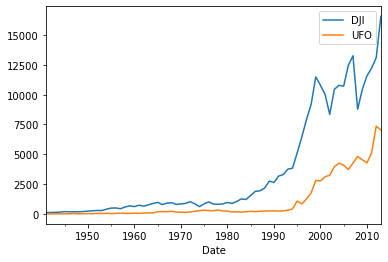

In [89]:
levels.plot()
plt.show()

# Looking at a Regression's R-Squared

R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

In [95]:
x = levels['DJI'].values
y = levels['UFO'].values
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = np.corrcoef(x,y)#x.corr(y)
print("The correlation between x and y is ", correlation[0,1])

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is  0.9399762210726432
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     538.7
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           7.05e-35
Time:                        11:26:16   Log-Likelihood:                -572.05
No. Observations:                  73   AIC:                             1148.
Df Residuals:                      71   BIC:                             1153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

# Match Correlation with Regression Output

Here are four scatter plots, each showing a linear regression line and an R-squared:

<center><img src="images/01.04.png"  style="width: 400px, height: 300px;"/></center>


- Figure 3

# A Popular Strategy Using Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see attachment. 

In [97]:
MSFT = pd.read_csv("dataset/MSFT.csv", parse_dates=["Date"],index_col=["Date"])
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [98]:
# Convert the daily data to weekly data
MSFT = MSFT.resample('W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


# Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

In [99]:
daily_rates = pd.read_csv("dataset/MSFT.csv", parse_dates=["Date"],index_col=["Date"])
daily_rates

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351
...,...
2017-07-31,72.699997
2017-08-01,72.580002
2017-08-02,72.260002


In [101]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['Adj Close'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample('A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['Adj Close'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.00
The autocorrelation of annual interest rate changes is -0.78
